<a href="https://colab.research.google.com/github/bcdc0de/Estudo-UFPE/blob/main/Projeto-Ci%C3%AAncia-De-Dados/Codigo_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Ciência de Dados

Aluno:
* Amanda Barbosa da Silva
* Bruno Cardoso Dantas

In [ ]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.5 MB/s eta 0:00:00


In [ ]:
# Importação

import pandas as pd
import mlflow
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import drive

## Coletar Dados

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

drive  sample_data


In [ ]:
%cd /content/drive/MyDrive/UFPE - Ciência de Dados/Projeto Ciência de Dados/dataset/

!ls

/content/drive/MyDrive/UFPE - Ciência de Dados/Projeto Ciência de Dados/dataset
Walmart_sales.csv


In [ ]:
# Carregar os dados

df_walmart = pd.read_csv('./Walmart_sales.csv')

## Analisar dados

In [ ]:
# Visualizar as primeiras linhas do dataset

df_walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# Visualizar informações sobre o dataset

df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
# Calcular estatísticas descritivas para as colunas numéricas

df_walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


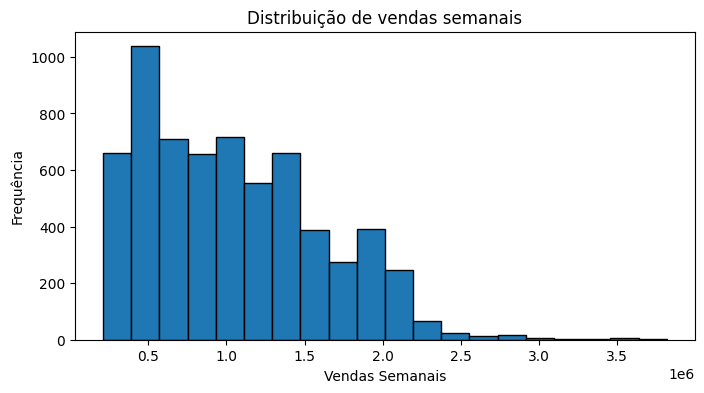

In [ ]:
# Visualizar a distribuição das vendas semanais

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(df_walmart['Weekly_Sales'], bins=20, edgecolor='black')
plt.xlabel('Vendas Semanais')
plt.ylabel('Frequência')
plt.title('Distribuição de vendas semanais')
plt.show()

## Separar os dados em treinamento, validação e teste

In [ ]:
# Separar features (X) e target (y)

X = df_walmart.drop(['Weekly_Sales'], axis=1)
y = df_walmart['Weekly_Sales']

In [ ]:
# Separar dados em treinamento (70%), validação (15%) e teste (15%)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Verificar o tamanho dos conjuntos

print("Tamanho do conjunto de treinamento:", len(X_train))
print("Tamanho do conjunto de validação:", len(X_val))
print("Tamanho do conjunto de teste:", len(X_test))

Tamanho do conjunto de treinamento: 4504
Tamanho do conjunto de validação: 965
Tamanho do conjunto de teste: 966


## Selecionar 4 algoritmos de predição

In [ ]:
# Inicializar os modelos

model_lr = LinearRegression()
model_dt = DecisionTreeRegressor(random_state=42)
model_rf = RandomForestRegressor(random_state=42)
model_gb = GradientBoostingRegressor(random_state=42)

## Executar o treinamento com seleção de hiperparâmetros (utilizar grid search ou optuna)

In [ ]:
# Definir os hiperparâmetros para a pesquisa em grade

param_grid_lr = {'fit_intercept': [True, False]}
param_grid_dt = {'max_depth': [None, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10]}
param_grid_rf = {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10]}
param_grid_gb = {'n_estimators': [10, 50, 100], 'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [3, 5, 10]}

In [ ]:
# Configurar a pesquisa em grade

grid_search_lr = GridSearchCV(model_lr, param_grid_lr, cv=5)
grid_search_dt = GridSearchCV(model_dt, param_grid_dt, cv=5)
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5)
grid_search_gb = GridSearchCV(model_gb, param_grid_gb, cv=5)

In [ ]:
# Ajustar o modelo e procurar os melhores hiperparâmetros

grid_search_lr.fit(X_train, y_train)
grid_search_dt.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [ ]:
# Imprimir os melhores hiperparâmetros

print("Melhores hiperparâmetros para Linear Regression: ", grid_search_lr.best_params_)
print("Melhores hiperparâmetros para Decision Tree: ", grid_search_dt.best_params_)
print("Melhores hiperparâmetros para Random Forest: ", grid_search_rf.best_params_)
print("Melhores hiperparâmetros para Gradient Boosting: ", grid_search_gb.best_params_)

Melhores hiperparâmetros para Linear Regression:  {'fit_intercept': True}
Melhores hiperparâmetros para Decision Tree:  {'max_depth': 10, 'min_samples_split': 2}
Melhores hiperparâmetros para Random Forest:  {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 50}
Melhores hiperparâmetros para Gradient Boosting:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [ ]:
# Avaliar os modelos

score_lr = grid_search_lr.score(X_test, y_test)
score_dt = grid_search_dt.score(X_test, y_test)
score_rf = grid_search_rf.score(X_test, y_test)
score_gb = grid_search_gb.score(X_test, y_test)

In [ ]:
print("Score para Linear Regression: ", score_lr)
print("Score para Decision Tree: ", score_dt)
print("Score para Random Forest: ", score_rf)
print("Score para Gradient Boosting: ", score_gb)

Score para Linear Regression:  0.1583940697652143
Score para Decision Tree:  0.9201000634754604
Score para Random Forest:  0.9547454906523938
Score para Gradient Boosting:  0.9627685626534399


## Selecionar o modelo com melhor resultado na métrica de avaliação e avaliá-lo no conjunto de teste (utilizar MLflow)

In [ ]:
# Criar um experimento no MLflow

mlflow.set_experiment('walmart_sales_experiment')

2024/02/20 01:21:06 INFO mlflow.tracking.fluent: Experiment with name 'walmart_sales_experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/drive/MyDrive/UFPE%20-%20Cie%CC%82ncia%20de%20Dados/Projeto%20Cie%CC%82ncia%20de%20Dados/dataset/mlruns/428674435387641541', creation_time=1708392066044, experiment_id='428674435387641541', last_update_time=1708392066044, lifecycle_stage='active', name='walmart_sales_experiment', tags={}>

In [ ]:
# Iniciar uma corrida do MLflow

with mlflow.start_run():
    # Criar e treinar o modelo de Gradient Boosting com os melhores parâmetros encontrados
    model_gb = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=42)
    model_gb.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = model_gb.predict(X_test)

    # Calcular métricas de avaliação
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Registrar métricas no MLflow
    mlflow.log_param('model', 'GradientBoostingRegressor')
    mlflow.log_metric('mse', mse)
    mlflow.log_metric('r2', r2)

    # Salvar o modelo no MLflow
    mlflow.sklearn.log_model(model_gb, 'model')

    # Finalizar a corrida do MLflow
    mlflow.end_run()

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


## Fazer diagnóstico do modelo

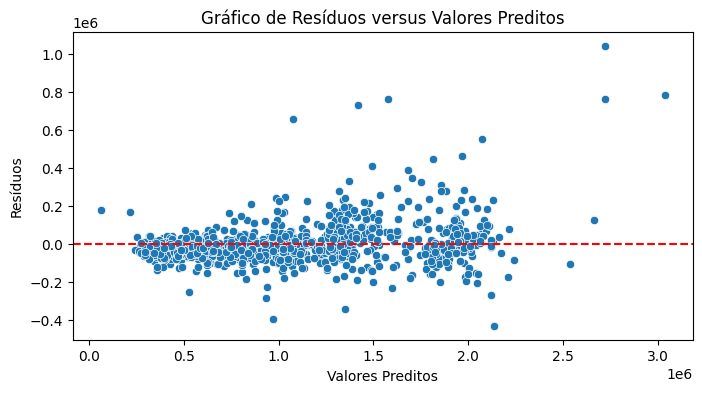

In [ ]:
# Análise de Resíduos:

# Fazer previsões no conjunto de teste
y_pred = model_gb.predict(X_test)

# Calcular os resíduos
residuals = y_test - y_pred

# Gráfico de resíduos versus valores preditos
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos versus Valores Preditos')
plt.show()

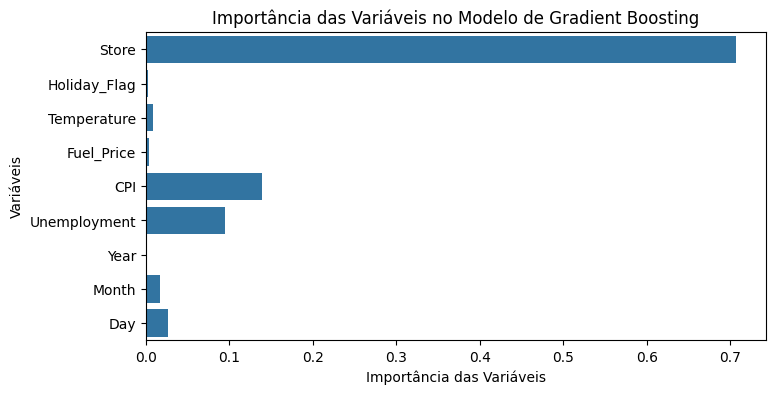

In [ ]:
# Importância das Variáveis:

# Plotar a importância das variáveis
feature_importance = model_gb.feature_importances_
feature_names = X_train.columns
plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importance, y=feature_names)
plt.xlabel('Importância das Variáveis')
plt.ylabel('Variáveis')
plt.title('Importância das Variáveis no Modelo de Gradient Boosting')
plt.show()

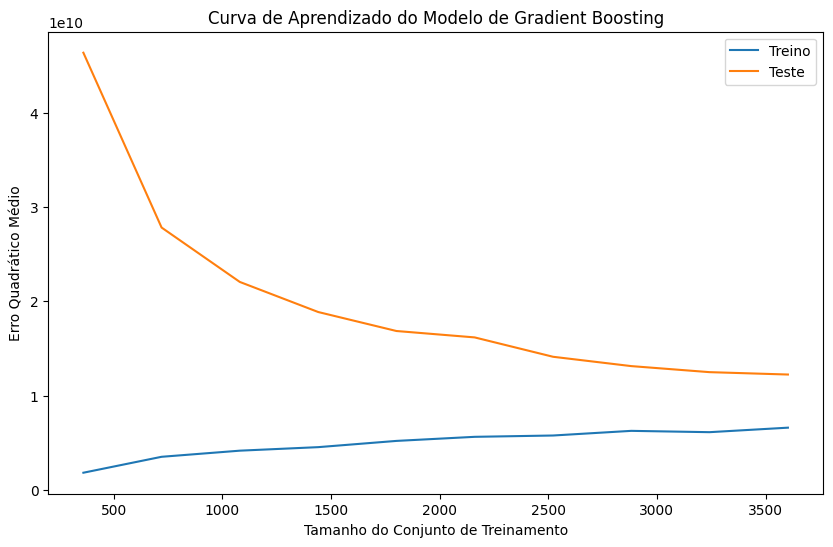

In [ ]:
# Curvas de Aprendizado:

# Plotar a curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(
    model_gb, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
    )

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Treino')
plt.plot(train_sizes, test_scores_mean, label='Teste')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Erro Quadrático Médio')
plt.title('Curva de Aprendizado do Modelo de Gradient Boosting')
plt.legend()
plt.show()

In [ ]:
# Métricas de Avaliação:

# Calcular métricas de avaliação
y_pred = model_gb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro Quadrático Médio (MSE):", mse)
print("Coeficiente de Determinação (R²):", r2)

Erro Quadrático Médio (MSE): 12272486267.048334
Coeficiente de Determinação (R²): 0.9627685626534399
